In [297]:
#pip install pyspellchecker
#pip install spacy


In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns


import random
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  WordNetLemmatizer

import matplotlib.pyplot as plt

from spellchecker import SpellChecker
from IPython.display import display
import csv

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /Users/wolfx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/wolfx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wolfx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /Users/wolfx/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [3]:

#Organizando a base de dados em um arquivo csv

df_txt = pd.read_csv('baseCompleta.txt', delimiter='\t', header=None)

nome_arquivo_csv = "baseCompleta.csv"
with open(nome_arquivo_csv, mode='w', newline='',encoding='utf-8') as arquivo_csv:
   
    escritor_csv = csv.writer(arquivo_csv, delimiter=',', quotechar='"',quoting=csv.QUOTE_MINIMAL)
    dados = ["texto", "sentimento"]
    escritor_csv.writerow(dados)
   
    for index, row in df_txt.iterrows():
        texto = row[0].replace("(", "").replace(")", "").replace("'", "")
        posicao_ultima_virgula = texto.rfind(',')
        if posicao_ultima_virgula != -1:
            dados = texto[:posicao_ultima_virgula] + texto[posicao_ultima_virgula+1:]
            if dados.count(",") >= 2:
              dados = dados.replace(",", "", 1)
          #  print(dados)
        alterar_ultima_virgula =dados.rfind(',')   
        
        escritor_csv.writerow(dados.split(','))
#print(f"Arquivo CSV '{nome_arquivo_csv}' criado com sucesso!")


In [4]:
df = pd.read_csv('baseCompleta.CSV', delimiter=',')
# Exibe a quantidade de linhas e colunas
quantidade_linhas, quantidade_colunas = df.shape
print(f"Quantidade de Linhas: {quantidade_linhas}")
print(f"Quantidade de Colunas: {quantidade_colunas}")

Quantidade de Linhas: 765
Quantidade de Colunas: 2


In [5]:
#listagem das categorias e as quantidades 
contagem_emocoes = df['sentimento'].value_counts()
for sentimento, quantidade in contagem_emocoes.items():
    print(f"Sentimento: {sentimento}, Quantidade: {quantidade}")

Sentimento: alegria, Quantidade: 160
Sentimento: desgosto, Quantidade: 125
Sentimento: medo, Quantidade: 120
Sentimento: raiva, Quantidade: 120
Sentimento: surpresa, Quantidade: 120
Sentimento: tristeza, Quantidade: 120


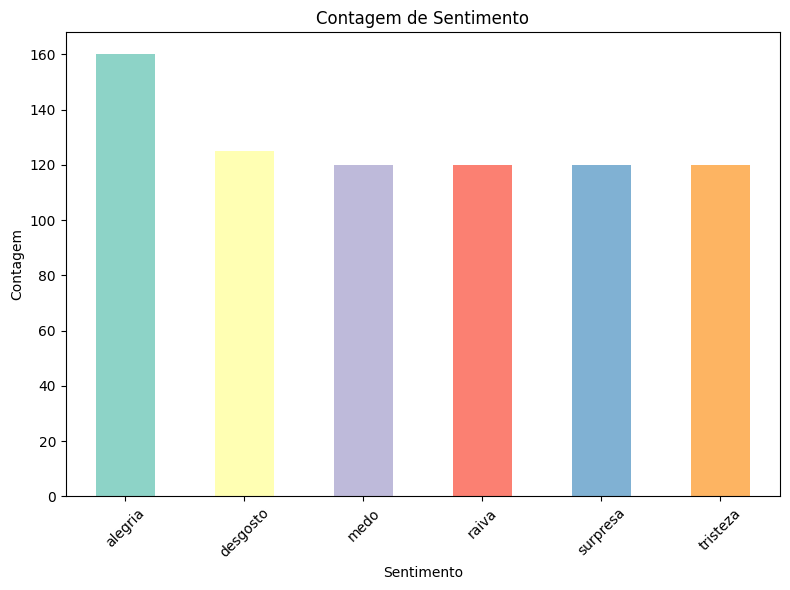

In [6]:

# Contagem das ocorrências de cada emoção
contagem_sentimentos = df['sentimento'].value_counts()
cores = sns.color_palette('Set3', len(contagem_sentimentos))
plt.figure(figsize=(8, 6))
contagem_sentimentos.plot(kind='bar', color=cores)
plt.title('Contagem de Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

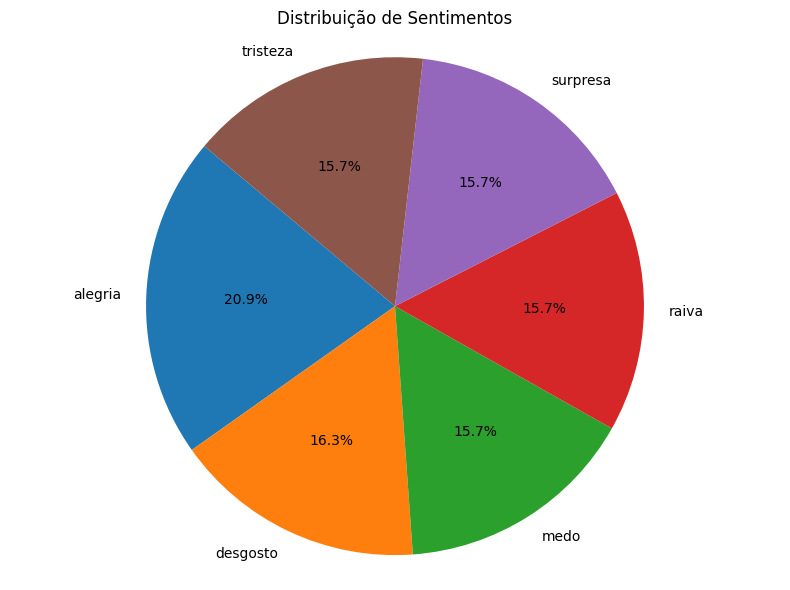

In [7]:
#Distribuição dos sentimentos
contagem_sentimentos = df['sentimento'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(contagem_sentimentos, labels=contagem_sentimentos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Sentimentos')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [8]:
#Visualizando o dataFrame antes do balanceamento
df

,texto,sentimento
0,este trabalho e agradavel,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesao ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como voce e,alegria
...,...,...
760,acho que isso e defeituoso,tristeza
761,os remedios me derrubam na cama,tristeza
762,a depressao vai me derrubar,tristeza
763,suas desculpas sao falsas,tristeza


In [9]:
#Balanceando a base de dados
contagem_emocoes = df['sentimento'].value_counts()
quantidade_minima = contagem_emocoes.min()

# Criado um novo DataFrame balanceado
df_balanceado = pd.DataFrame()

#Adicinonado emoções no novo dataFrame
for emocao in contagem_emocoes.index:
    amostras_emocao = df[df['sentimento'] == emocao].sample(n=quantidade_minima, random_state=42)
    df_balanceado = pd.concat([df_balanceado, amostras_emocao])


In [10]:
#Visualizando o dataFrame antes do preprocessamento
df_balanceado

,texto,sentimento
105,desejo a voce tudo de bom,alegria
108,anseio por seus proximos trabalhos,alegria
566,me sinto completamente segura,alegria
55,voce e como um sonho doce,alegria
94,o amor e abundante,alegria
...,...,...
751,quem esta descontente com os outros esta desco...,tristeza
467,nao consigo parar de chorar,tristeza
737,voce e um chorao,tristeza
504,eu falhei em tudo nessa vida,tristeza


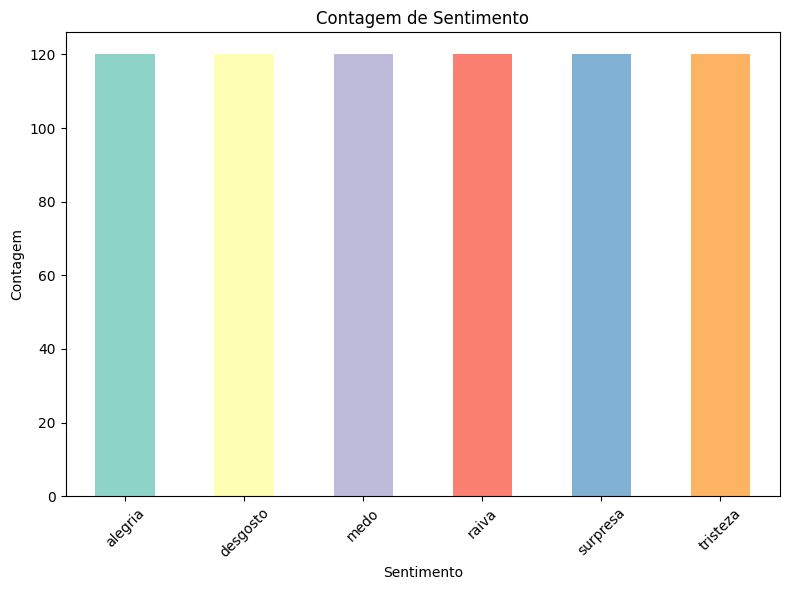

In [11]:
# Contagem das ocorrências de cada emoção após balanceamento do dataFrame df

contagem_sentimentos = df_balanceado['sentimento'].value_counts()
cores = sns.color_palette('Set3', len(contagem_sentimentos))
plt.figure(figsize=(8, 6))
contagem_sentimentos.plot(kind='bar', color=cores)
plt.title('Contagem de Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

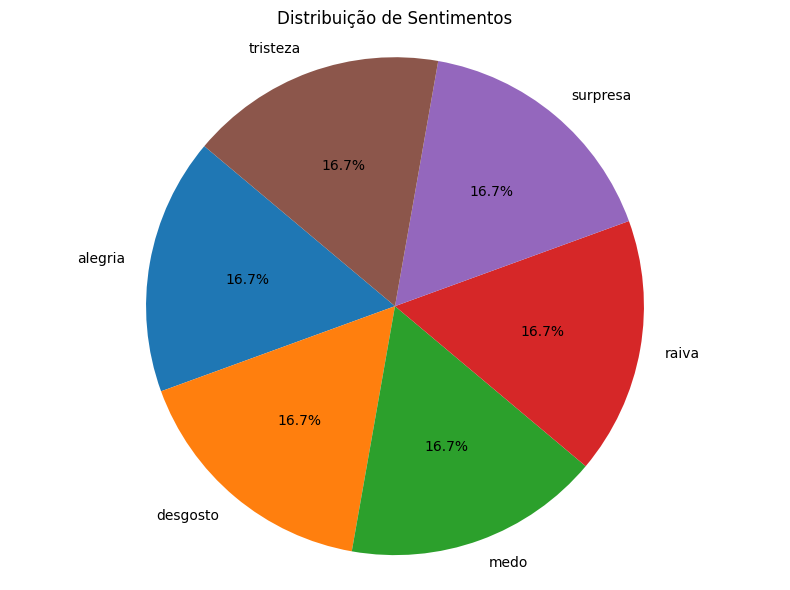

In [12]:
#Distribuição dos sentimentos após o balanceamento do dataFrame df
contagem_sentimentos = df_balanceado['sentimento'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(contagem_sentimentos, labels=contagem_sentimentos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Sentimentos')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [13]:
df_balanceado

,texto,sentimento
105,desejo a voce tudo de bom,alegria
108,anseio por seus proximos trabalhos,alegria
566,me sinto completamente segura,alegria
55,voce e como um sonho doce,alegria
94,o amor e abundante,alegria
...,...,...
751,quem esta descontente com os outros esta desco...,tristeza
467,nao consigo parar de chorar,tristeza
737,voce e um chorao,tristeza
504,eu falhei em tudo nessa vida,tristeza


In [14]:
def remover_stopwords_df(df, coluna_texto):
    # Obtém as stopwords em português
    stopwords_pt = set(stopwords.words('portuguese'))
    # Função para remover stopwords de um texto
    def remover_stopwords_texto(texto):
        palavras = word_tokenize(texto, language='portuguese')
        palavras_sem_stopwords = [palavra for palavra in palavras if palavra.lower() not in stopwords_pt]
        texto_sem_stopwords = ' '.join(palavras_sem_stopwords)
        return texto_sem_stopwords

    # Aplica a função de remoção de stopwords à coluna 'Texto' do DataFrame
    df[coluna_texto] = df[coluna_texto].apply(remover_stopwords_texto)
    return df

In [15]:
df_balanceado = remover_stopwords_df(df_balanceado, 'texto')


In [16]:
def corrigir_ortografia_texto(texto):
    palavras = word_tokenize(texto, language='portuguese')
    spell = SpellChecker(language='pt')
    # Corrija a ortografia de cada palavra ou mantenha a palavra original
    palavras_corrigidas = [spell.correction(palavra) if palavra.isalpha() and spell.correction(palavra) else palavra for palavra in palavras]
    texto_corrigido = ' '.join(palavras_corrigidas)
    return texto_corrigido

In [17]:
df_balanceado['texto'] = df_balanceado['texto'].apply(corrigir_ortografia_texto)

In [18]:
df_balanceado

,texto,sentimento
105,desejo voce tudo bom,alegria
108,anseio proximos trabalhos,alegria
566,sinto completamente segura,alegria
55,voce sonho doce,alegria
94,amor abundante,alegria
...,...,...
751,descontente outros descontente consigo proprio,tristeza
467,nao consigo parar chorar,tristeza
737,voce chorar,tristeza
504,falhei tudo nessa vida,tristeza


In [19]:
def remover_caracteres_non_ascii(texto):
    # Usa uma expressão regular para substituir caracteres não-ASCII por espaços em branco
    texto_limpo = re.sub(r'[^\x00-\x7F]+', ' ', texto)
    return texto_limpo

In [20]:
df_balanceado['texto'] = df_balanceado['texto'].apply(remover_caracteres_non_ascii)

In [21]:
def remover_pontuacao(texto):
    # Obtém a lista de caracteres de pontuação
    pontuacao = string.punctuation
    # Utilizado uma expressão lambda para criar uma função de filtro
    # que remove caracteres de pontuação do texto
    texto_sem_pontuacao = ''.join(filter(lambda char: char not in pontuacao, texto))
    
    return texto_sem_pontuacao

In [22]:
df_balanceado['texto'] = df_balanceado['texto'].apply(remover_pontuacao)

In [23]:
def remover_emojis(texto):
    # Usa uma expressão regular para remover emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emojis emotivos
                               u"\U0001F300-\U0001F5FF"  # símbolos e pictogramas
                               u"\U0001F680-\U0001F6FF"  # transportes e símbolos de mapa
                               u"\U0001F700-\U0001F77F"  # símbolos alquímicos
                               u"\U0001F780-\U0001F7FF"  # símbolos geométricos estendidos
                               u"\U0001F800-\U0001F8FF"  # suplemento aos símbolos geométricos
                               u"\U0001F900-\U0001F9FF"  # símbolos de escrita
                               u"\U0001FA00-\U0001FA6F"  # símbolos de xadrez
                               u"\U0001FA70-\U0001FAFF"  # emojis de zodíaco
                               u"\U0001F004-\U0001F0CF"  # símbolos de cartas de baralho
                               u"\U0001F170-\U0001F251"  # emojis de símbolos de letras
                               "]+", flags=re.UNICODE)
    
    # Substitui os emojis por espaços em branco
    texto_sem_emojis = emoji_pattern.sub(r' ', texto)
    
    return texto_sem_emojis

In [317]:
df_balanceado['texto'] = df_balanceado['texto'].apply(remover_emojis)

In [318]:
def lematizar_palavras(palavras):
    # Instância do WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lematize as palavras
    lematizados = [lemmatizer.lemmatize(palavra, pos='v') for palavra in palavras]
    return lematizados

In [319]:
df_balanceado['texto'] = df_balanceado['texto'].apply(lematizar_palavras)

In [25]:
#Visualizando o dataFrame após o pré processamento
df_balanceado

,texto,sentimento
105,desejo voce tudo bom,alegria
108,anseio proximos trabalhos,alegria
566,sinto completamente segura,alegria
55,voce sonho doce,alegria
94,amor abundante,alegria
...,...,...
751,descontente outros descontente consigo proprio,tristeza
467,nao consigo parar chorar,tristeza
737,voce chorar,tristeza
504,falhei tudo nessa vida,tristeza
